In [1]:
import numpy as np
import os
import zipfile
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import torch
import sys
sys.path.append('/home/bis/230711_JSG/230602_JSG_Image/')
from Mymodule.ModelHandler import *
from Mymodule.Utils import *
from Mymodule.GradCam import *
from Mymodule.BatchHandler import *

In [2]:
device = torch.device('cuda:2')
model_name = 'vgg16'

In [3]:
def explort_imgs(images, parent_dir,candidates):
    for i,image in enumerate(images):
        file_path = os.path.join(parent_dir, f'{candidates[i]}')
        print(file_path)
        cv2.imwrite(file_path, image)
    print('exported..done')
    
def calculate_zero_ratios(img):
    w, h = img.shape
    zeros = 0
    for i in range(w):
        for j in range(w):
            if img[i, j] <= 0:
                zeros += 1
    return zeros / (w*h)

class LayerActivation():
    features = None    
    def __init__(self, model, layer_num):
        self.hook = model.base.features[layer_num].register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output):
        self.features = output.cpu().data.numpy()
    def remove(self):
        self.hook.remove()

        
activation = {}

def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook


In [4]:
image_path

NameError: name 'image_path' is not defined

In [5]:
#candidates = ['10749325(2)_56_0', '10859932(2)_78_0', '10749325(3)_56_1']
candidates = ['14934497_23_1', '14985233_40_1', '14943382_51_1']
candidates2 = ['14934497 23 2', '14985233 40 2', '14943382 51 2']

root = './Data/cropped_images/'

images = {}
image_names = {}
crops = [1,3,4,6]
for crop in crops:
    images[crop] = []
    image_names[crop] = []
    for i, candidate in enumerate(candidates):
        if crop != 1 : image_root = os.path.join(root,'crop'+f'_{crop}', 'val', candidate)
        if crop == 1 : image_root = os.path.join('./Images/Validation/',candidates2[i])
        surfixs = []
        for i in range(crop):
            surfixs.append(f'_part_{i+1}.png')
        for surfix in surfixs:
            if crop != 1: image_path = image_root + surfix
            if crop == 1: image_path = image_root + '.png'
            image = cv2.imread(image_path)
            image = cv2.resize(image,(140,140))
            images[crop].append(image)
            image_names[crop].append(image_path.split('/')[-1])
    images[crop] = np.array(images[crop])
    test_y = np.zeros([9,1])

print(test_y.shape)

(9, 1)


In [7]:
for crop in crops:
    test_loader = GetLoader([], images[crop], np.zeros([crop*3,1]), batch=crop*3, test=True)      
    for train_strategy in ['finetuning']:
        for i,(data, label) in enumerate(test_loader):
            data = data
            label = label
            if crop != 1 : model_save_path = f'./Model/voting{crop}_{model_name}_{train_strategy}.pt'
            if crop == 1 : model_save_path = f'./Model/{model_name}_{train_strategy}.pt'

            model = get_model(model_name, device, pretrained=True)    
            model.load_state_dict(torch.load(model_save_path))
            model.eval()

            last_layer = model.base.features[-2]
            cam = GradCAM(model=model, target_layer=last_layer, device=device)
            grayscale_cam = cam(input_tensor=data, target_category=0)
            
    visuals = get_visuals(images[crop]/255, grayscale_cam)
    explort_imgs(visuals, f'./GradCam_cropped_images/{crop}/', image_names[crop])

/home/bis/anaconda3/lib/python3.10/site-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


./GradCam_cropped_images/1/14934497 23 2.png
./GradCam_cropped_images/1/14985233 40 2.png
./GradCam_cropped_images/1/14943382 51 2.png
exported..done
./GradCam_cropped_images/3/14934497_23_1_part_1.png
./GradCam_cropped_images/3/14934497_23_1_part_2.png
./GradCam_cropped_images/3/14934497_23_1_part_3.png
./GradCam_cropped_images/3/14985233_40_1_part_1.png
./GradCam_cropped_images/3/14985233_40_1_part_2.png
./GradCam_cropped_images/3/14985233_40_1_part_3.png
./GradCam_cropped_images/3/14943382_51_1_part_1.png
./GradCam_cropped_images/3/14943382_51_1_part_2.png
./GradCam_cropped_images/3/14943382_51_1_part_3.png
exported..done
./GradCam_cropped_images/4/14934497_23_1_part_1.png
./GradCam_cropped_images/4/14934497_23_1_part_2.png
./GradCam_cropped_images/4/14934497_23_1_part_3.png
./GradCam_cropped_images/4/14934497_23_1_part_4.png
./GradCam_cropped_images/4/14985233_40_1_part_1.png
./GradCam_cropped_images/4/14985233_40_1_part_2.png
./GradCam_cropped_images/4/14985233_40_1_part_3.png
./G

/home/bis/230711_JSG/230602_JSG_Image/Mymodule/GradCam.py:119: RuntimeWarning: invalid value encountered in divide
  img = img / np.max(img)


./GradCam_cropped_images/6/14934497_23_1_part_1.png
./GradCam_cropped_images/6/14934497_23_1_part_2.png
./GradCam_cropped_images/6/14934497_23_1_part_3.png
./GradCam_cropped_images/6/14934497_23_1_part_4.png
./GradCam_cropped_images/6/14934497_23_1_part_5.png
./GradCam_cropped_images/6/14934497_23_1_part_6.png
./GradCam_cropped_images/6/14985233_40_1_part_1.png
./GradCam_cropped_images/6/14985233_40_1_part_2.png
./GradCam_cropped_images/6/14985233_40_1_part_3.png
./GradCam_cropped_images/6/14985233_40_1_part_4.png
./GradCam_cropped_images/6/14985233_40_1_part_5.png
./GradCam_cropped_images/6/14985233_40_1_part_6.png
./GradCam_cropped_images/6/14943382_51_1_part_1.png
./GradCam_cropped_images/6/14943382_51_1_part_2.png
./GradCam_cropped_images/6/14943382_51_1_part_3.png
./GradCam_cropped_images/6/14943382_51_1_part_4.png
./GradCam_cropped_images/6/14943382_51_1_part_5.png
./GradCam_cropped_images/6/14943382_51_1_part_6.png
exported..done


TypeError: 'NoneType' object is not subscriptable

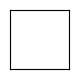

In [326]:
model = get_model(model_name, device, pretrained=True)    
model.load_state_dict(torch.load(model_save_path))

conv_out = LayerActivation(model, 42)
conv_out.remove()
maps = conv_out.features

fig = plt.figure(figsize=(13,4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0.1, wspace=0.1)

mean_zero_ratio = 0.0

for i in range(512):
    if i < 100:
        ax = fig.add_subplot(5, 20, i+1, xticks=[], yticks=[])
        ax.imshow(maps[0][i])
    mean_zero_ratio += calculate_zero_ratios(maps[0][i])

mean_zero_ratio /= 512
print('%.4f' % mean_zero_ratio)